In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv("diabetes_data.csv")

In [3]:
df = df.drop(df.columns[[0,-1]], axis=1)

In [14]:
X = df.drop(['Diagnosis'], axis=1)
y = df['Diagnosis']
print(X)

      Age  Gender  Ethnicity  SocioeconomicStatus  EducationLevel        BMI  \
0      44       0          1                    2               1  32.985284   
1      51       1          0                    1               2  39.916764   
2      89       1          0                    1               3  19.782251   
3      21       1          1                    1               2  32.376881   
4      27       1          0                    1               3  16.808600   
...   ...     ...        ...                  ...             ...        ...   
1874   37       0          0                    2               2  20.811137   
1875   80       1          0                    2               2  27.694312   
1876   38       1          0                    0               2  35.640824   
1877   43       0          1                    2               0  32.423016   
1878   85       1          0                    2               2  33.145119   

      Smoking  AlcoholConsumption  Phys

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [6]:
results = {
    "LightGBM": [],
    "XGBoost": [],
    "ANN": [],
    "SVM": []
}

In [7]:
lgbm_model = LGBMClassifier(
           
    learning_rate=0.05,      
    max_depth=7,            
    num_leaves=31,           
    min_child_samples=20,    
    subsample=0.8,           
    colsample_bytree=0.8,    
    random_state=42)
for iteration in range(1, 101):  # 1 to 100 iterations
    lgbm_model.n_estimators = iteration
    lgbm_model.fit(X_train, y_train)
    y_pred = lgbm_model.predict(X_test)
    results["LightGBM"].append(accuracy_score(y_test, y_pred))

[LightGBM] [Info] Number of positive: 602, number of negative: 901
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000392 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4863
[LightGBM] [Info] Number of data points in the train set: 1503, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.400532 -> initscore=-0.403248
[LightGBM] [Info] Start training from score -0.403248
[LightGBM] [Info] Number of positive: 602, number of negative: 901
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000468 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4863
[LightGBM] [Info] Number of data points in the train set: 1503, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.400532 -> initscore=-0.403248
[LightGBM] [Info] Start training from score -0.403248
[LightGBM] [Info] Numb

In [8]:
xgb_model = XGBClassifier(
    
    learning_rate=0.05,
    max_depth=6,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    random_state=42
)
for iteration in range(1, 101):  # 1 to 100 iterations
    xgb_model.n_estimators = iteration
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict(X_test)
    results["XGBoost"].append(accuracy_score(y_test, y_pred))

In [9]:
ann_model = Sequential([
    Dense(32, activation='relu', input_dim=X_train.shape[1]),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = ann_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)
results["ANN"] = history.history['val_accuracy']

c:\Users\16521\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
X_train

,Age,Gender,Ethnicity,SocioeconomicStatus,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,BlurredVision,SlowHealingSores,TinglingHandsFeet,QualityOfLifeScore,HeavyMetalsExposure,OccupationalExposureChemicals,WaterQuality,MedicalCheckupsFrequency,MedicationAdherence,HealthLiteracy
183,68,1,0,2,2,28.813610,1,15.697398,8.834202,3.738902,...,0,0,0,19.214735,0,0,1,2.563521,5.538108,0.813880
978,51,0,0,2,3,19.766550,0,0.549022,8.057190,9.694633,...,0,0,0,60.405073,0,1,0,3.873659,1.722256,2.835902
1804,90,1,0,1,3,21.194713,0,5.334513,4.424541,5.473772,...,0,0,0,25.046039,0,0,0,1.217435,5.895902,1.106113
501,61,0,0,1,3,31.010301,1,18.572269,2.003165,3.213917,...,0,0,0,61.010832,0,1,0,0.844844,2.191180,7.611327
449,38,1,0,1,1,29.701038,1,17.632110,6.758428,6.101010,...,1,0,0,58.888751,0,0,1,3.805022,6.530706,1.827961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1419,46,0,0,2,1,29.984985,0,17.174002,5.005354,5.636777,...,0,0,1,71.653285,0,0,1,1.725200,2.498857,0.239152
791,77,0,0,1,2,33.939006,1,19.927154,2.020318,7.364166,...,0,0,0,27.006492,0,0,0,3.909115,9.887864,5.682418
625,90,1,0,2,1,38.667766,1,5.248007,1.415017,7.282458,...,0,0,0,90.136049,0,0,0,0.624746,5.799004,8.562323
1017,45,1,0,1,2,31.046400,1,8.934952,6.849502,7.118321,...,0,0,0,2.473581,0,0,0,2.696027,2.751302,5.419853


In [11]:
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
for iteration in range(1, 101):
    subset_size = max(1, int(len(X_train) * iteration / 100))  # Ensure at least 1 sample
    print(subset_size)
    svm_model.fit(X_train[:subset_size], y_train[:subset_size])  # Use subset for training
    y_pred = svm_model.predict(X_test)
    results["SVM"].append(accuracy_score(y_test, y_pred))
    print(accuracy_score(y_test, y_pred))

15
0.601063829787234
30
0.601063829787234
45
0.601063829787234
60
0.601063829787234
75
0.601063829787234
90
0.601063829787234
105
0.601063829787234
120
0.601063829787234
135
0.601063829787234
150
0.601063829787234
165
0.601063829787234
180
0.601063829787234
195
0.601063829787234
210
0.601063829787234
225
0.601063829787234
240
0.601063829787234
255
0.6063829787234043
270
0.6223404255319149
285
0.6090425531914894
300
0.6409574468085106
315
0.6276595744680851
330
0.601063829787234
345
0.6037234042553191
360
0.6143617021276596
375
0.6462765957446809
390
0.6409574468085106
405
0.675531914893617
420
0.648936170212766
435
0.6675531914893617
450
0.675531914893617
465
0.6781914893617021
480
0.6223404255319149
495
0.6702127659574468
511
0.6303191489361702
526
0.675531914893617
541
0.6702127659574468
556
0.6808510638297872
571
0.6675531914893617
586
0.6808510638297872
601
0.6808510638297872
616
0.6702127659574468
631
0.6781914893617021
646
0.6835106382978723
661
0.6968085106382979
676
0.696808510

In [12]:
DNN_model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),  
    Dense(32, activation='relu'),  
    Dense(16, activation='relu'), 
    Dense(1, activation='sigmoid')
])
DNN_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = DNN_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)
results["DNN"] = history.history['val_accuracy']

c:\Users\16521\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


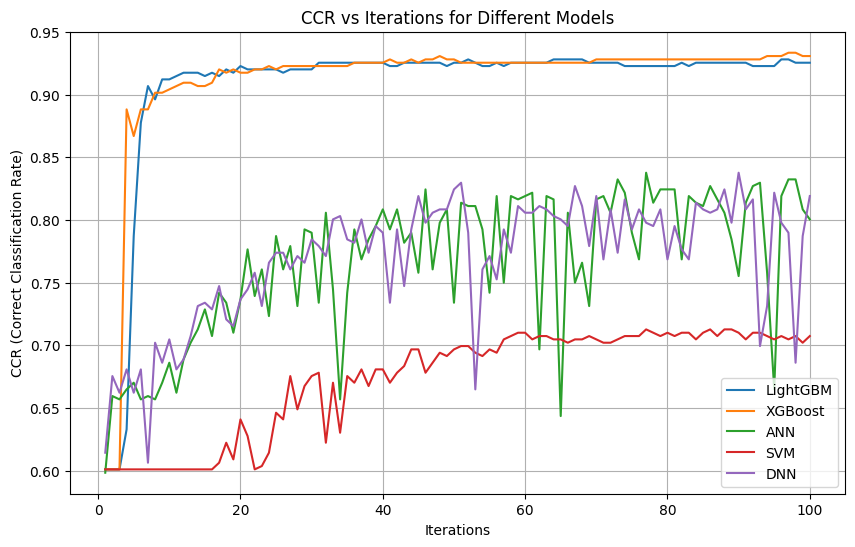

In [13]:
iterations = range(1, 101)

plt.figure(figsize=(10, 6))


for model, ccr_values in results.items():
    if not ccr_values: 
        results[model] = [0] * len(iterations)  
    elif len(ccr_values) < len(iterations):  
        results[model] += [ccr_values[-1]] * (len(iterations) - len(ccr_values)) 
    elif len(ccr_values) > len(iterations):  
        results[model] = ccr_values[:len(iterations)]  


for model, ccr_values in results.items():
    plt.plot(iterations, ccr_values, label=model)

plt.title("CCR vs Iterations for Different Models")
plt.xlabel("Iterations")
plt.ylabel("CCR (Correct Classification Rate)")
plt.legend()
plt.grid(True)
plt.show()